In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
sys.path.insert(0, '/home/tomek/ib_tools/')
from indicators import get_signals
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [3]:
data = pd.read_pickle('freeze/backtest/freeze_df_NQH0.pickle')

In [4]:
data.tail(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2019-12-27 17:32:00,False,8814.75,8818.25,8809.25,8818.00,8818.00,10035,8812.321871,8722.384272,12.246425,0.0,1.0,0.0
2019-12-27 17:57:00,False,8818.00,8820.25,8811.50,8812.25,8812.25,10244,8812.297914,8723.869656,12.207791,0.0,1.0,0.0
2019-12-27 18:18:00,False,8812.00,8813.75,8802.75,8809.50,8809.50,10043,8811.365276,8725.285034,12.194445,0.0,1.0,0.0
2019-12-27 18:40:00,False,8809.50,8810.75,8797.00,8797.75,8797.75,10324,8806.826851,8726.482802,12.211633,0.0,1.0,0.0
2019-12-27 19:10:00,False,8797.75,8807.75,8795.75,8803.75,8803.75,10106,8805.801234,8727.759946,12.209295,0.0,1.0,0.0
2019-12-27 19:31:00,False,8804.00,8804.00,8787.00,8791.50,8791.50,10177,8801.034156,8728.813500,12.262231,0.0,1.0,0.0
2019-12-27 20:01:00,False,8791.50,8798.50,8791.25,8797.75,8797.75,10147,8799.939437,8729.952947,12.206847,0.0,1.0,0.0
2019-12-27 20:33:00,False,8797.50,8805.75,8792.25,8803.75,8803.75,10058,8801.209625,8731.172733,12.221136,0.0,1.0,0.0
2019-12-27 21:10:00,False,8803.75,8808.00,8800.50,8801.25,8801.25,10146,8801.223083,8732.331035,12.168969,0.0,1.0,0.0


/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


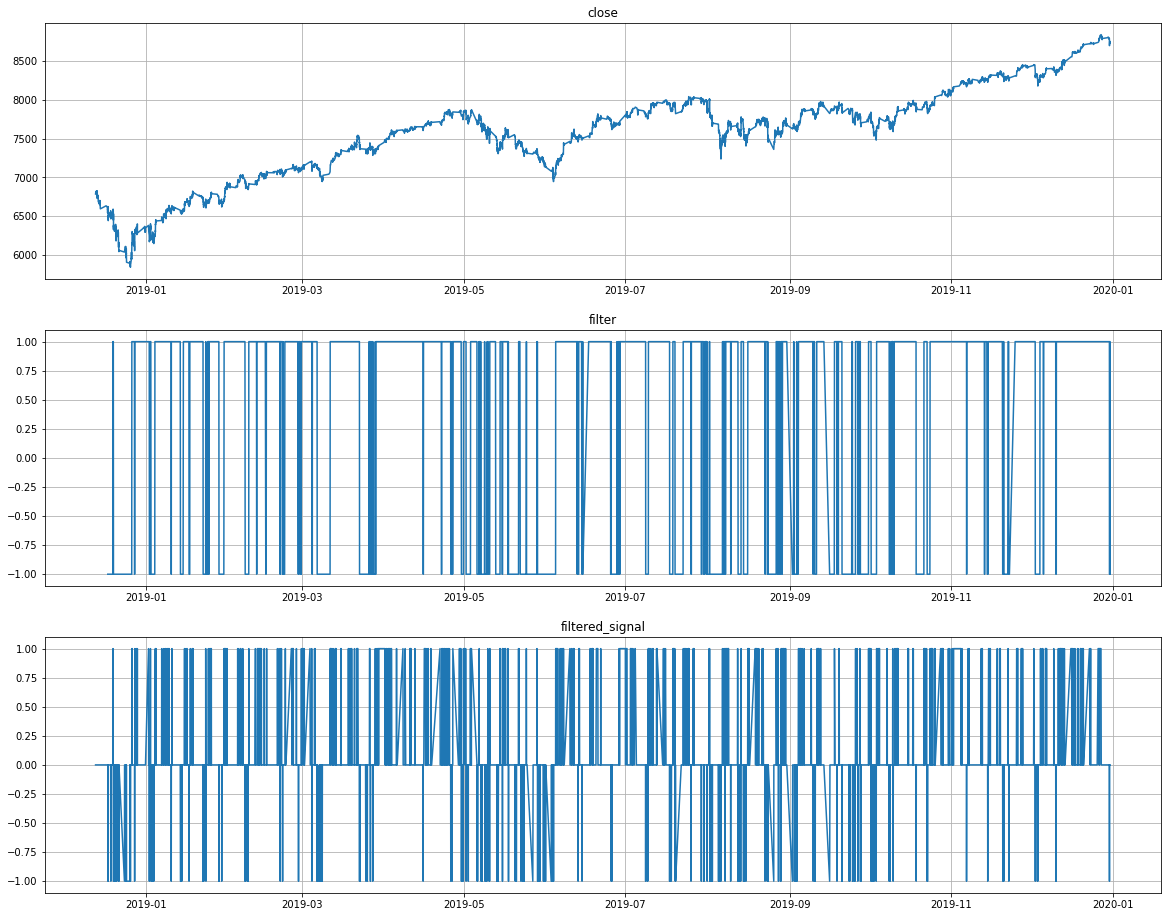

In [5]:
plot(data[['close', 'filter', 'filtered_signal']]);

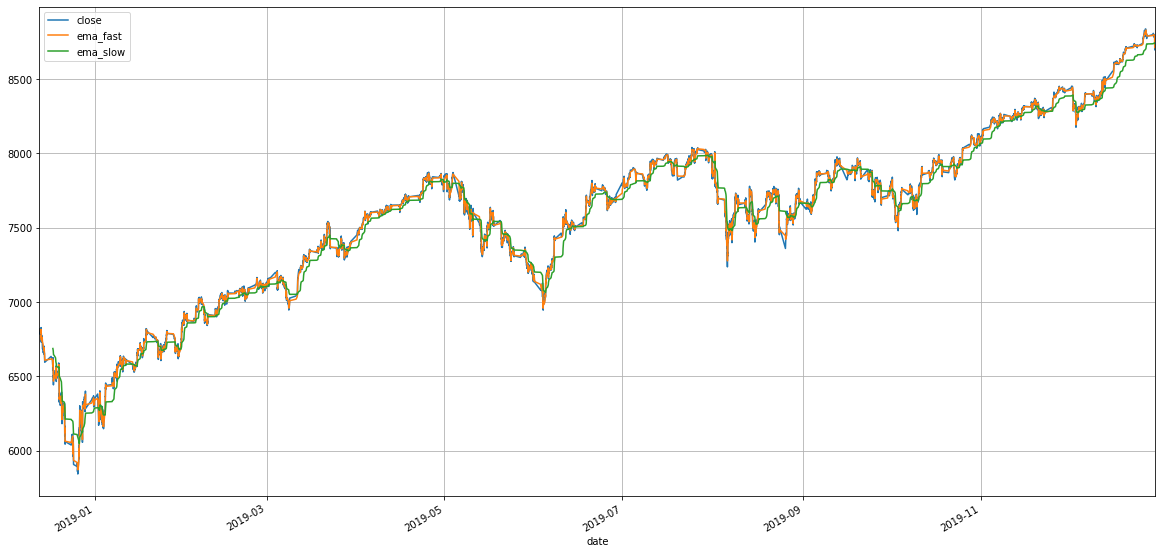

In [6]:
data[['close', 'ema_fast', 'ema_slow']].plot(figsize=(20,10), grid=True);

In [6]:
data.loc['20200228 15:00':]

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-02-28 15:13:00,True,8218.00,8258.75,8180.00,8199.75,8199.75,27215,8248.794018,8616.493318,65.826412,0.0,-1.0,0.0
2020-02-28 15:29:00,True,8199.25,8199.25,8129.00,8148.00,8148.00,27006,8215.196012,8608.528355,65.880228,-1.0,-1.0,-1.0
2020-02-28 15:35:00,True,8147.75,8294.25,8126.25,8277.00,8277.00,28143,8235.797341,8602.894626,67.121199,0.0,-1.0,0.0
2020-02-28 15:42:30,True,8277.00,8322.00,8258.50,8297.00,8297.00,27287,8256.198228,8597.698908,67.077242,0.0,-1.0,0.0
2020-02-28 15:49:30,True,8296.25,8308.00,8206.25,8231.25,8231.25,27118,8247.882152,8591.477496,67.497667,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06 21:13:00,False,8344.25,8369.50,8316.50,8367.25,8367.25,27429,8376.739577,8600.867377,65.064426,0.0,-1.0,0.0
2020-03-06 21:27:00,False,8366.75,8407.00,8340.50,8399.00,8399.00,27691,8384.159718,8597.528753,65.080402,0.0,-1.0,0.0
2020-03-06 21:36:00,False,8399.50,8459.50,8358.50,8433.25,8433.25,27793,8400.523145,8594.811822,65.480087,0.0,-1.0,0.0


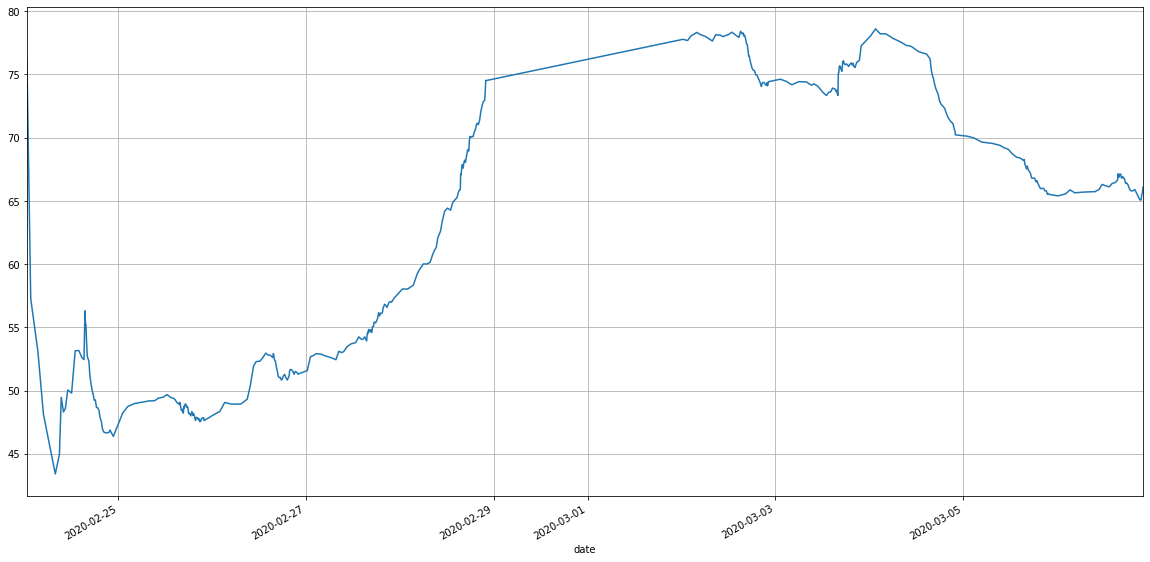

In [7]:
data['atr'].plot(figsize=(20, 10), grid=True);

In [8]:
data.loc['20180206':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-02-24 00:45:30,True,9355.25,9365.00,9289.00,9329.00,9329.00,27021,NaN,NaN,76.000000,0.0,NaN,0.0
2020-02-24 01:43:30,True,9328.50,9332.00,9293.25,9302.50,9302.50,27088,NaN,NaN,57.271528,0.0,NaN,0.0
2020-02-24 03:32:30,True,9302.25,9313.25,9268.25,9271.75,9271.75,27051,NaN,NaN,53.135485,0.0,NaN,0.0
2020-02-24 04:58:00,True,9271.00,9286.50,9253.00,9282.50,9282.50,26970,9288.938462,NaN,48.144498,0.0,NaN,0.0
2020-02-24 08:00:00,True,9282.50,9302.75,9277.75,9290.75,9290.75,27232,9289.633886,NaN,43.412165,0.0,NaN,0.0
2020-02-24 09:03:30,True,9290.75,9291.00,9238.50,9247.00,9247.00,27086,9274.054887,NaN,44.969188,0.0,NaN,0.0
2020-02-24 09:31:30,True,9247.25,9251.00,9175.50,9186.00,9186.00,27490,9242.878582,NaN,49.477456,0.0,NaN,0.0
2020-02-24 10:05:00,True,9186.00,9200.00,9159.50,9170.25,9170.25,27408,9217.686082,NaN,48.311151,0.0,NaN,0.0
2020-02-24 10:34:30,True,9170.50,9180.50,9129.75,9140.50,9140.50,27252,9191.270252,NaN,48.594333,0.0,NaN,0.0


In [9]:
data['long'] = data['filtered_signal'] > 0
data['short'] = data['filtered_signal'] < 0
data['out'] = data['filtered_signal'] == 0
data['long'] = data['long'] * data['price']
data['short'] = data['short'] * data['price']
data['out'] = data['out'] * data['price']
data[['long', 'short', 'out']] = data[['long', 'short', 'out']].replace({0:np.nan})
data.tail()

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-03-06 21:13:00,False,8344.25,8369.50,8316.50,8367.25,8367.25,27429,8376.739577,8600.867377,65.064426,0.0,-1.0,0.0,NaN,NaN,8367.25
2020-03-06 21:27:00,False,8366.75,8407.00,8340.50,8399.00,8399.00,27691,8384.159718,8597.528753,65.080402,0.0,-1.0,0.0,NaN,NaN,8399.00
2020-03-06 21:36:00,False,8399.50,8459.50,8358.50,8433.25,8433.25,27793,8400.523145,8594.811822,65.480087,0.0,-1.0,0.0,NaN,NaN,8433.25
2020-03-06 21:48:00,False,8433.00,8476.75,8395.50,8444.00,8444.00,27102,8415.015430,8592.317639,65.655549,0.0,-1.0,0.0,NaN,NaN,8444.00
2020-03-06 21:55:30,False,8444.50,8545.00,8440.25,8521.25,8521.25,28274,8450.426953,8591.142306,66.090495,0.0,-1.0,0.0,NaN,NaN,8521.25


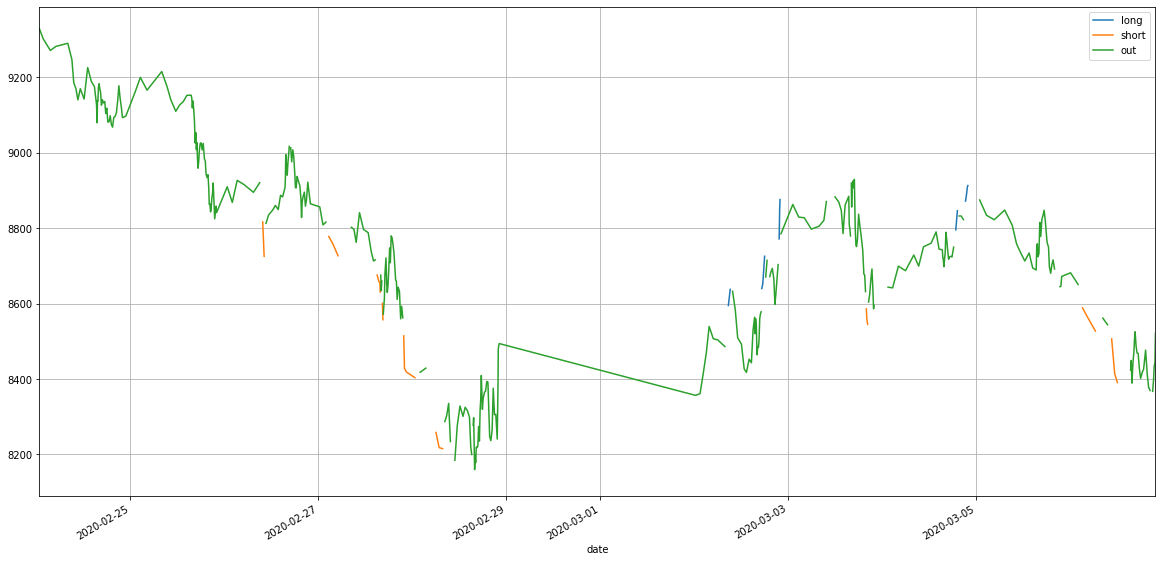

In [10]:
data[['long', 'short', 'out']].plot(figsize=(20, 10), grid=True);

In [11]:
periods = [10, 20, 40, 80, ]

In [12]:
min_max = pd.DataFrame({'close': data.price})

In [13]:
min_max

,close
date,
2020-02-24 00:45:30,9329.00
2020-02-24 01:43:30,9302.50
2020-02-24 03:32:30,9271.75
2020-02-24 04:58:00,9282.50
2020-02-24 08:00:00,9290.75
...,...
2020-03-06 21:13:00,8367.25
2020-03-06 21:27:00,8399.00
2020-03-06 21:36:00,8433.25


In [14]:
for p in periods:
    min_max[f'min_{p}'] = min_max.close.rolling(p).min()
    #min_max[f'max_{p}'] = min_max.close.rolling(p).max()

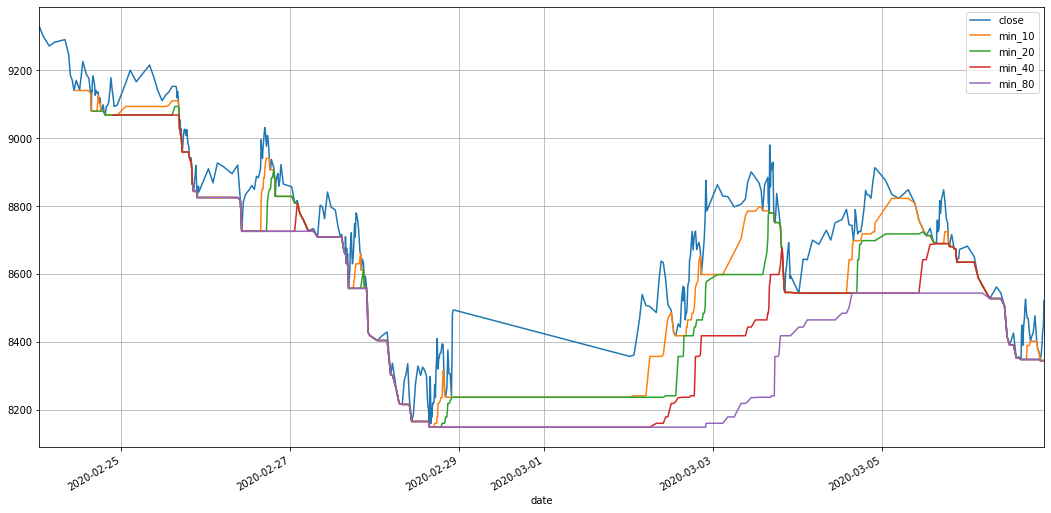

In [15]:
min_max.plot(figsize=(18, 9), grid=True);

In [16]:
data[data['signal'] != 0].loc['20190927':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-02-25 16:27:00,True,9089.50,9098.25,9046.00,9054.75,9054.75,28341,9096.350759,NaN,48.488666,-1.0,NaN,-0.0,NaN,NaN,9054.75
2020-02-25 16:33:30,True,9055.25,9067.75,9017.25,9026.25,9026.25,28847,9072.983839,NaN,48.533814,-1.0,NaN,-0.0,NaN,NaN,9026.25
2020-02-25 16:51:00,True,9054.00,9079.75,9007.50,9008.75,9008.75,27638,9047.298373,NaN,48.749740,-1.0,NaN,-0.0,NaN,NaN,9008.75
2020-02-25 17:08:30,True,9026.50,9037.75,8976.25,8983.75,8983.75,27252,9021.660388,NaN,48.906813,-1.0,NaN,-0.0,NaN,NaN,8983.75
2020-02-25 17:17:30,True,8983.50,9006.25,8955.50,8959.25,8959.25,27852,9000.856925,NaN,48.946003,-1.0,NaN,-0.0,NaN,NaN,8959.25
2020-02-25 19:19:30,True,8977.50,8993.50,8937.00,8943.75,8943.75,27285,8978.743814,NaN,48.202889,-1.0,NaN,-0.0,NaN,NaN,8943.75
2020-02-25 19:36:00,True,8943.75,8966.50,8931.75,8934.25,8934.25,27517,8963.912543,NaN,47.942194,-1.0,NaN,-0.0,NaN,NaN,8934.25
2020-02-25 20:01:00,True,8942.25,8962.00,8904.75,8907.00,8907.00,27089,8940.072241,NaN,47.823796,-1.0,NaN,-0.0,NaN,NaN,8907.00
2020-02-25 20:09:00,True,8906.75,8914.50,8863.00,8863.50,8863.50,28371,8914.548161,NaN,47.893317,-1.0,NaN,-0.0,NaN,NaN,8863.50


In [17]:
data[data['signal'] != 0].tail(60)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-02-27 02:41:30,True,8816.75,8826.00,8762.75,8778.25,8778.25,27092,8819.451427,8951.785248,52.922059,-1.0,-1.0,-1.0,NaN,8778.25,NaN
2020-02-27 03:47:00,True,8778.50,8796.00,8745.25,8757.50,8757.50,27034,8798.800951,8948.229092,52.891637,-1.0,-1.0,-1.0,NaN,8757.50,NaN
2020-02-27 05:02:30,True,8757.25,8765.75,8723.75,8727.00,8727.00,26982,8774.867301,8944.186937,52.739539,-1.0,-1.0,-1.0,NaN,8727.00,NaN
2020-02-27 07:43:00,True,8733.50,8738.75,8697.25,8708.25,8708.25,27055,8743.413245,8936.113552,52.442891,-1.0,-1.0,-1.0,NaN,8708.25,NaN
2020-02-27 15:03:30,True,8716.25,8729.50,8660.00,8675.75,8675.75,27389,8719.421682,8906.971753,54.251622,-1.0,-1.0,-1.0,NaN,8675.75,NaN
2020-02-27 15:29:30,True,8676.25,8680.50,8648.00,8658.25,8658.25,27197,8699.031121,8902.518717,53.958276,-1.0,-1.0,-1.0,NaN,8658.25,NaN
2020-02-27 15:33:30,True,8657.50,8688.00,8635.75,8657.75,8657.75,28409,8685.270748,8898.142470,53.935294,-1.0,-1.0,-1.0,NaN,8657.75,NaN
2020-02-27 15:45:00,True,8709.00,8722.50,8649.50,8656.00,8656.00,28681,8680.842555,8890.512206,54.542312,-1.0,-1.0,-1.0,NaN,8656.00,NaN
2020-02-27 15:50:30,True,8655.75,8656.25,8605.75,8630.75,8630.75,27109,8664.145036,8885.886319,54.488315,-1.0,-1.0,-1.0,NaN,8630.75,NaN


In [18]:
averages = pd.DataFrame({'price': data.price,
                       'ema_fast': data.price.ewm(span=100).mean(),
                       'ema_slow': data.price.ewm(span=160).mean()})

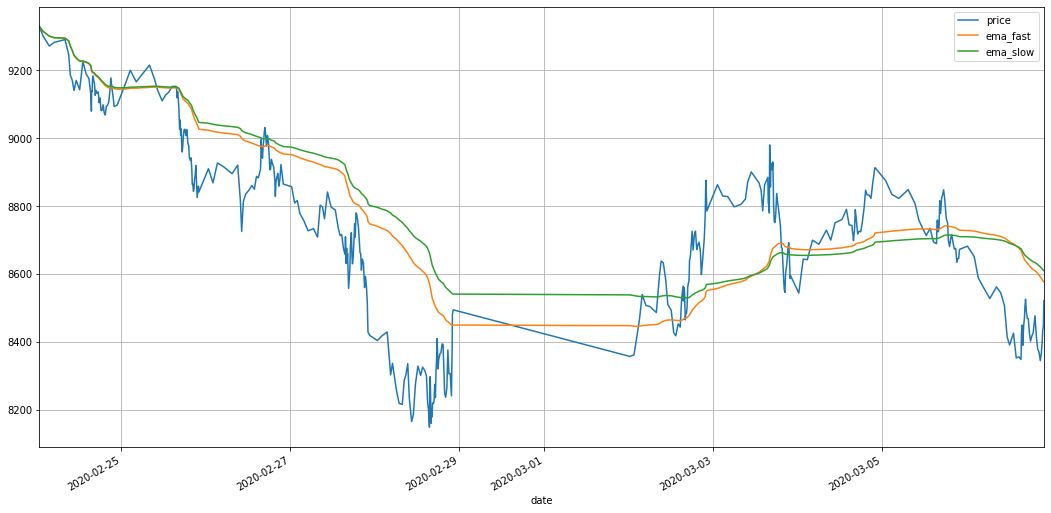

In [19]:
averages.plot(figsize=(18,9), grid=True);

In [20]:
data.loc['20180221':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-02-24 00:45:30,True,9355.25,9365.00,9289.00,9329.00,9329.00,27021,NaN,NaN,76.000000,0.0,NaN,0.0,NaN,NaN,9329.00
2020-02-24 01:43:30,True,9328.50,9332.00,9293.25,9302.50,9302.50,27088,NaN,NaN,57.271528,0.0,NaN,0.0,NaN,NaN,9302.50
2020-02-24 03:32:30,True,9302.25,9313.25,9268.25,9271.75,9271.75,27051,NaN,NaN,53.135485,0.0,NaN,0.0,NaN,NaN,9271.75
2020-02-24 04:58:00,True,9271.00,9286.50,9253.00,9282.50,9282.50,26970,9288.938462,NaN,48.144498,0.0,NaN,0.0,NaN,NaN,9282.50
2020-02-24 08:00:00,True,9282.50,9302.75,9277.75,9290.75,9290.75,27232,9289.633886,NaN,43.412165,0.0,NaN,0.0,NaN,NaN,9290.75
2020-02-24 09:03:30,True,9290.75,9291.00,9238.50,9247.00,9247.00,27086,9274.054887,NaN,44.969188,0.0,NaN,0.0,NaN,NaN,9247.00
2020-02-24 09:31:30,True,9247.25,9251.00,9175.50,9186.00,9186.00,27490,9242.878582,NaN,49.477456,0.0,NaN,0.0,NaN,NaN,9186.00
2020-02-24 10:05:00,True,9186.00,9200.00,9159.50,9170.25,9170.25,27408,9217.686082,NaN,48.311151,0.0,NaN,0.0,NaN,NaN,9170.25
2020-02-24 10:34:30,True,9170.50,9180.50,9129.75,9140.50,9140.50,27252,9191.270252,NaN,48.594333,0.0,NaN,0.0,NaN,NaN,9140.50
